In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('after_eda_spam.xlsx')
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [9]:
df.dropna(inplace=True)

######  converting transformed_text column 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

x_cv = cv.fit_transform(df['transformed_text']).toarray()
y_cv = df.Target.values

x_tf = tf.fit_transform(df['transformed_text']).toarray()
y_tf = df.Target.values

###### train-test split

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tf,y_tf, test_size=0.2, random_state=2)


###### model training

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


# gnb
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.876937984496124
[[800 106]
 [ 21 105]]
0.4976303317535545


In [30]:
# mnb
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9593023255813954
[[906   0]
 [ 42  84]]
1.0


In [32]:
# bnb
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9718992248062015
[[904   2]
 [ 27  99]]
0.9801980198019802


# We are going to use more models and will see their prformace also

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [45]:
classifiers = {'SVC':svc, 'KN':knc, 'NB':mnb, 'DT':dtc, 'LR':lrc, 'RF':rfc, 'AdaBoost':abc, 'Bgc':bc, 'ETC':etc, 'GBDT':gbdt, 'xgb':xgb}

In [50]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [51]:
train_classifier(svc, x_train, y_train, x_test, y_test)


(0.9709302325581395, 0.98)

In [52]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print('For', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9709302325581395
Precision -  0.98
For KN
Accuracy -  0.9127906976744186
Precision -  1.0
For NB
Accuracy -  0.9593023255813954
Precision -  1.0
For DT
Accuracy -  0.9341085271317829
Precision -  0.7416666666666667
For LR
Accuracy -  0.9554263565891473
Precision -  0.9444444444444444
For RF
Accuracy -  0.9709302325581395
Precision -  1.0
For AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.96
For Bgc
Accuracy -  0.9534883720930233
Precision -  0.8145161290322581
For ETC
Accuracy -  0.9728682170542635
Precision -  0.99
For GBDT
Accuracy -  0.9573643410852714
Precision -  0.9270833333333334
For xgb
Accuracy -  0.9670542635658915
Precision -  0.9181818181818182


In [62]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),
                               'Accuracy': accuracy_scores,
                            'Precision':precision_scores }).sort_values(by='Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.959302,1.000000
5,RF,0.970930,1.000000
8,ETC,0.972868,0.990000
0,SVC,0.970930,0.980000
6,AdaBoost,0.967054,0.960000
4,LR,0.955426,0.944444
9,GBDT,0.957364,0.927083
10,xgb,0.967054,0.918182
7,Bgc,0.953488,0.814516


In [66]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.959302
2,RF,Accuracy,0.970930
3,ETC,Accuracy,0.972868
4,SVC,Accuracy,0.970930
5,AdaBoost,Accuracy,0.967054
6,LR,Accuracy,0.955426
7,GBDT,Accuracy,0.957364
8,xgb,Accuracy,0.967054
9,Bgc,Accuracy,0.953488


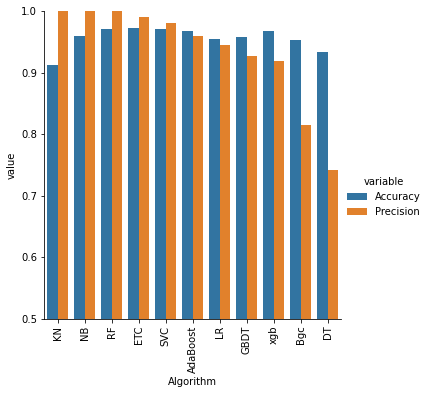

In [71]:
sns.catplot(x = 'Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0) 
plt.xticks(rotation = 'vertical')
plt.show()

# 

# Model Improving

    1. Change the max_features parametet of Tfid
    2. Scaling
    3. Voting Classifier

In [80]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svc',svc), ('nb',mnb),('et',etc)], voting='soft')
voting.fit_transform(x_train, y_train)

array([[9.96982413e-01, 3.01758703e-03, 9.89661754e-01, 1.03382458e-02,
        1.00000000e+00, 0.00000000e+00],
       [9.94650427e-01, 5.34957263e-03, 9.37703629e-01, 6.22963713e-02,
        1.00000000e+00, 0.00000000e+00],
       [9.75880688e-01, 2.41193115e-02, 9.75025120e-01, 2.49748800e-02,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99502230e-01, 4.97769841e-04, 9.95684588e-01, 4.31541236e-03,
        1.00000000e+00, 0.00000000e+00],
       [9.97065612e-01, 2.93438775e-03, 9.94835188e-01, 5.16481198e-03,
        1.00000000e+00, 0.00000000e+00],
       [9.96691137e-01, 3.30886295e-03, 9.96983200e-01, 3.01679984e-03,
        1.00000000e+00, 0.00000000e+00]])

In [81]:
y_pred = voting.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9786821705426356
Precision 0.9905660377358491


Voting is not performing better than NB

In [ ]:
# Applying Stacking

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = [('svc',svc), ('nb',mnb),('et',etc)], final_estimator = RandomForestClassifier())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Accuracy ', accuracy_score(y_test. y_pred))
print('Precision ', precision_score(y_test, y_pred))